# GoogleNet CIFAR-10 Dataset Classification
* Author: Ziad Tamim
* Description: Training Googlenet with CIFAR-10 Dataset. Loading data, building the Lenet achetiture using tensorflow, training the model, and evaluating its performance.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


2024-04-30 13:41:00.529495: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 13:41:00.529581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 13:41:00.650724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Training and testing data (MNIST)
* Loading the data and splitting it
* Normalising pixle values
* Flatten labels

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Building the Inception (googlenet) architechture using tensorflow

In [3]:
def inception_module(x, filters):
    # 1x1 conv
    path1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 1x1 conv followed by 3x3 conv
    path2 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(path2)

    # 1x1 conv followed by 5x5 conv
    path3 = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(path3)

    # 3x3 max pooling followed by 1x1 conv
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(path4)

    # concatenate filters
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet(input_shape=(32, 32, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial convolution and pooling layers
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Inception modules
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = inception_module(x, [128, 128, 192, 32, 96, 64])

    # Final pooling and dense layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the GoogLeNet model
model = build_googlenet()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 16, 16,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 8, 8, 64)  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 96)  │      6,240 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 16)  │      1,040 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 8, 8, 64)  │      4,160 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 8, 8, 128) │    110,720 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 32)  │     12,832 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 8, 8, 32)  │      2,080 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8, 8, 256) │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_3[0][0],   │
│                     │                   │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 8, 8, 32)  │      8,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 256) │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8, 192) │    221,376 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 8, 8, 96)  │     76,896 │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 8, 8, 64)  │     16,448 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 8, 8, 480) │          0 │ conv2d_7[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_9[0][0],   │
│                     │                   │            │ conv2d_11[0][0],  │
│                     │                   │            │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 786,682 (3.00 MB)

 Trainable params: 786,682 (3.00 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model
* 40 epochs
* 64 batch size

In [4]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_test, y_test))


Epoch 1/40
 18/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1042 - loss: 2.3113  

I0000 00:00:1714484492.902966     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.2486 - loss: 1.9509 - val_accuracy: 0.4630 - val_loss: 1.4254
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4704 - loss: 1.4465 - val_accuracy: 0.5323 - val_loss: 1.2827
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5419 - loss: 1.2740 - val_accuracy: 0.5434 - val_loss: 1.2601
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5843 - loss: 1.1546 - val_accuracy: 0.6175 - val_loss: 1.0524
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6288 - loss: 1.0461 - val_accuracy: 0.6347 - val_loss: 1.0115
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6619 - loss: 0.9610 - val_accuracy: 0.6700 - val_loss: 0.9377
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6929 - loss: 0.8730 - val_accuracy: 0.6962 - val_loss: 0.8882
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7138 - loss: 0.8059 - val_accuracy: 0.7086 - v

## Visualising Training Accuracy and Loss

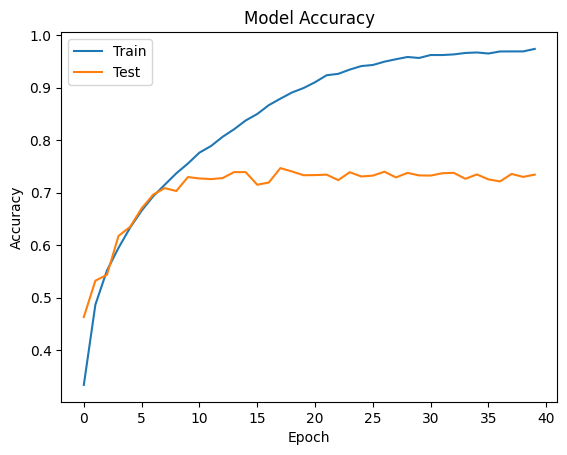

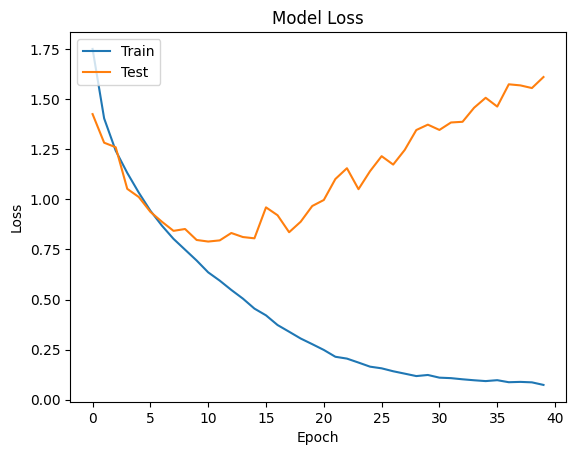

In [5]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Evaluaing the model using confusion matrix and classification report

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


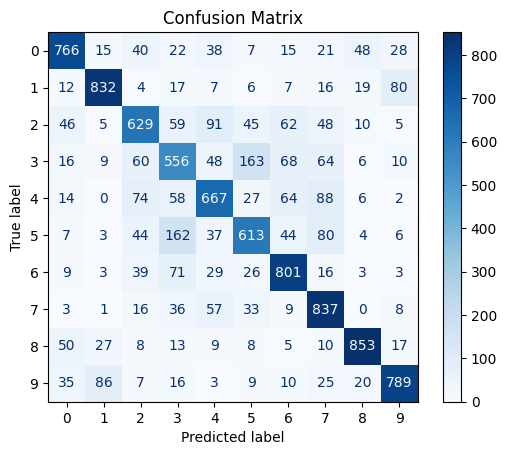

Classification Report:
               precision    recall  f1-score   support

           0     0.7996    0.7660    0.7824      1000
           1     0.8481    0.8320    0.8400      1000
           2     0.6830    0.6290    0.6549      1000
           3     0.5505    0.5560    0.5532      1000
           4     0.6765    0.6670    0.6717      1000
           5     0.6542    0.6130    0.6329      1000
           6     0.7382    0.8010    0.7683      1000
           7     0.6946    0.8370    0.7592      1000
           8     0.8803    0.8530    0.8664      1000
           9     0.8323    0.7890    0.8101      1000

    accuracy                         0.7343     10000
   macro avg     0.7357    0.7343    0.7339     10000
weighted avg     0.7357    0.7343    0.7339     10000



In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predictions for the test set
prediction_scores = model.predict(x_test)
predicted_labels = np.argmax(prediction_scores, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, predicted_labels, digits=4)
print('Classification Report:\n', report)


## Predicting an image lable from the test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


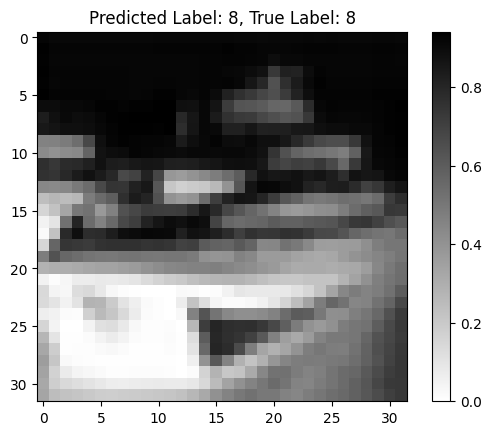

In [7]:
# Inference on a single image
img_index = 1
selected_image = x_test[img_index]
selected_label = y_test[img_index]
image_for_inference = np.expand_dims(selected_image, 0)
predictions = model.predict(image_for_inference)
predicted_label = np.argmax(predictions)

# Display the image
plt.figure()
plt.imshow(selected_image[:, :, 0], cmap=plt.cm.binary)
plt.title(f'Predicted Label: {predicted_label}, True Label: {selected_label}')
plt.colorbar()
plt.grid(False)
plt.show()